# Домашняя работа к лекции "Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок".

In [9]:
import scipy.stats as stats
import numpy as np

**Задание 0 Найдите минимально необходимый объем выборки для построения интервальной оценки среднего. - точность ∆ = 3; - дисперсия σ^2 = 225; - уровень доверия β = 0.95.**

In [5]:
precision = 3 # точность
dispersion = 225 # дисперсия
b = 0.95
se = np.sqrt(dispersion)
Z = 1.96 #по таблице
n = (Z * se / precision)**2

In [7]:
print(f'Минимальный объем выборки для построения интервальной оценки среднего {round(n,2)}')

Минимальный объем выборки для построения интервальной оценки среднего 96.04


**Задание 1 Постройте `98% доверительный интервал` для среднего значения. - объем выборки n = 25; - среднее x¯ = 130`; - стандартное отклонение σ = 12.**

In [18]:
x = 130
se = 12
confidence = 0.98
n = 25

h = se / np.sqrt(n) * stats.t.ppf((1 + confidence)/2, n)

In [21]:
print(f'доверительный интервал ({round(x-h,2)};{round(x+h,2)})')

доверительный интервал (124.04;135.96)


**Задание 2 Даны две выборки роста мужчин и женщин. Докажите используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен `0.001`.**

In [22]:
np.random.seed(13)

population_men = stats.norm.rvs(loc=19, scale=171, size=11000000) # выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000) # выборка женщин со средним ростом 165

stats.ttest_ind(population_men, population_women, equal_var=False)

Ttest_indResult(statistic=1.38763940250259, pvalue=0.16527258480335127)

Значение p-value == 0.16 превышает уровень значимости 0.001. Следовательно,нет оснований отвергнуть нулевую гипотезу.Т.е. различия между выборками незначительно.

**Задание 3 Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе: - стандартное отклонение = 150; - уровень доверия = 95%; - погрешность 50 рублей.**

In [23]:
precision = 50 # точность
se = 150 # дисперсия
b = 0.95
Z = 1.96 #по таблице
n = (Z * se / precision)**2

In [24]:
print(f'Минимальный объем выборки для построения интервальной оценки среднего {round(n,2)}')

Минимальный объем выборки для построения интервальной оценки среднего 34.57


**Задание 4 Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже). Можно ли сказать, что маг действительно умеет предсказывать погоду, если уровнь значимости принять за `0.05`?**

In [30]:
import pandas as pd

In [31]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [34]:
import scipy as sp
oddsratio, pvalue = sp.stats.fisher_exact(observations)
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [36]:
print(f' Значение p-value {round(pvalue,2)} больше заданного уровня значимости, следовательно, нулевую гипотезу отвергнуть не можем,т.е. волшебник может предсказывать погоду')

 Значение p-value 0.35 больше заданного уровня значимости, следовательно, нулевую гипотезу отвергнуть не можем,т.е. волшебник может предсказывать погоду


**Задание № 5
Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия  𝛽=90%  для выборки:**

In [37]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

In [46]:
def mean_confidence_interval(data, confidence):   
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return round(m-h,2), round(m+h,2)

In [47]:
print(mean_confidence_interval(data, 0.9))

(6.07, 7.18)


**Задание № 6
Принадлежат ли выборки data_1 и data_2 одному множеству?**

Оцените это с помощью известных вам тестов для проверок статистических гипотез;
Покажите различия визуально.

In [48]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

In [50]:
# оценка с использованием t-критерия Стьюдента
t, p = stats.ttest_ind(data_1, data_2)
print(round(t,3), round(p,3))

7.357 0.0


In [55]:
print(f' Значение p-value {round(p,3)} близко к нулю, следовательно, нулевую гипотезу отвергаем, т.е. выборки не принадлежат одному множеству')

 Значение p-value 0.0 близко к нулю, следовательно, нулевую гипотезу отвергаем, т.е. выборки не принадлежат одному множеству


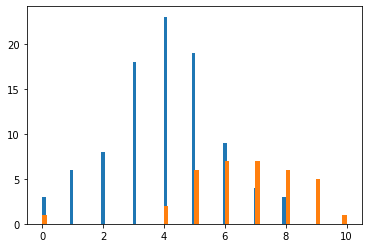

In [56]:
plt.hist(data_2, bins=70);
plt.hist(data_1, bins=70);

**Задание №7**

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

Предположим, Вы сформировали две гипотезы:
нулевая гипотеза - распределение нормальное;
альтернативная гипотеза - распределение ненормальное.
допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости p-value = 0.03. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)

Значение pvalue = 0.03. Если уровень доверия принять за 5%, то в этом случае мы отвергаем нулевую гипотезу о нормальном распределении. Следовательно будем считать, что распределение ненормально.

**Задание № 8**

Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом B.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

Требуется выяснить, имеется ли значимое различие эффективности препаратов А и B, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики? (уровень значимости принять за 0.05 (5%))

При каком минимальном p-value различия были бы уже значимы?

Если выборки незначительно отличаются, то продемонстрируйте это визуально

In [57]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

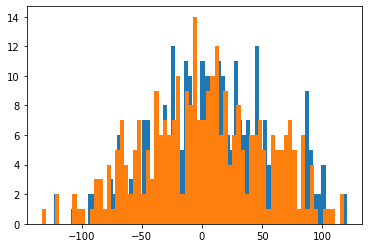

In [58]:
plt.hist(A, bins=70);
plt.hist(B, bins=70);

In [59]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=1.8847229265385363, pvalue=0.05995194857529052)

Значение p-value = 0.06 достаточно большое, следовательно, мы не может отвергнуть нулевую гипотезу, т.е. нет значимых различий в эффективности препаратов А и В. Об этом свидетельствует и график
При p-value < 0.001 различия между препаратами были бы значимы.